## Build basic linear regression model via python


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [31]:
# load dataset
data = pd.read_csv('data.csv')

In [32]:
# review the data
data

,Waist_cm,Weight_kg
0,68,120
1,65,112
2,67,115
3,76,130
4,88,134
5,80,127
6,66,111
7,79,121
8,85,131
9,70,120


In [33]:
data.shape

(11, 2)

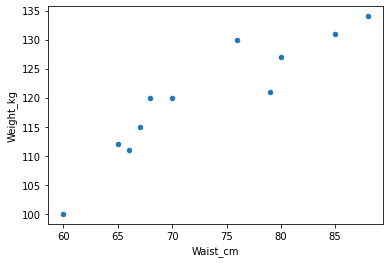

In [34]:
data.plot(kind='scatter', x='Waist_cm', y= 'Weight_kg')
plt.show()

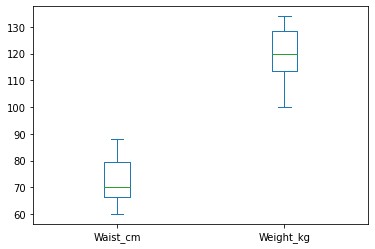

In [35]:
data.plot(kind='box')
plt.show()

In [36]:
data.corr() # correlation coefficients


,Waist_cm,Weight_kg
Waist_cm,1.000000,0.918059
Weight_kg,0.918059,1.000000


In [37]:
# change to dataframe variables
Waist=pd.DataFrame(data['Waist_cm'])
Weight=pd.DataFrame(data['Weight_kg'])

In [38]:
Waist

,Waist_cm
0,68
1,65
2,67
3,76
4,88
5,80
6,66
7,79
8,85
9,70


In [39]:
#Build linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(Waist, Weight)

In [40]:
model.coef_

array([[1.03558679]])

In [41]:
model.intercept_

array([44.39892905])

In [42]:
model.score(Waist, Weight)
# evaluate the model

0.8428329113206972

In [43]:
#Predict new value of weight
import numpy as np
Waist_new=np.array(79)
Waist_new = Waist_new.reshape(-1,1)
print(Waist_new)
Weight_predict=model.predict(Waist_new)
Weight_predict


[[79]]


/Users/zhiqi22/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([[126.21028559]])

In [44]:
#predict more values
X = ([67,68,100])
x=pd.DataFrame(X)
Y=model.predict(x)
Y=pd.DataFrame(Y)
df=pd.concat([x,Y],axis=1,keys=['Waist_new_cm','Weight_newPredict_kg'])
df

/Users/zhiqi22/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



,Waist_new_cm,Weight_newPredict_kg
,0,0
0,67,113.783244
1,68,114.818831
2,100,147.957608


InvalidIndexError: (slice(None, None, None), None)

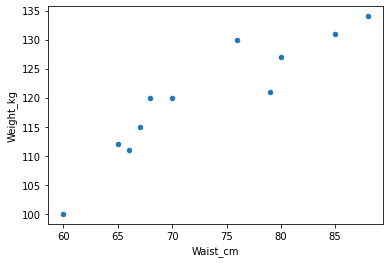

In [45]:
#Visualize the result
data.plot(kind='scatter',x='Waist_cm',y='Weight_kg')
plt.plot(Waist,model.predict(Waist),color='blue',linewidth=2)
plt.scatter(Waist_new,Weight_predict,color='red')
plt.show()

In [ ]:
#create known parameters
import torch

weight = 0.7
bias = 0.3
# create
start = 0
end = 1
step = 0.02

X = torch.arange(start,end, step).unsqueeze(dim=1)
Y = weight * X + bias
X[:10], Y[:10]
#X.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(Y)


(50, 50)

In [ ]:
## Spliting data into training and testing sets
train_split = int(0.8*len(X))
X_train, Y_train = X[:train_split], Y[:train_split] # we are using indexing here
X_test, Y_test = X[train_split:], Y[train_split:]

In [ ]:
len(X_train),len(X_test)#training data, testing data
len(Y_train),len(Y_test)#training label, testing labels

(40, 10)

## Visualize data

In [ ]:
import matplotlib.pyplot as plt
def plot_pred(train_data = X_train,
            train_label = Y_train,
            test_data=X_test,
            test_label= Y_test,
            pred=None):
    plt.figure(figsize=(5,5))

    plt.scatter(train_data, train_label, c='b',s=4,label='Training data')
    plt.scatter(test_data,test_label,c='r',s=4, label='Testing data')
    plt.legend()
    if pred is not None:
        plt.scatter(test_data,pred)
        plt.scatter(test_data,pred,c='r',s=4, label='predictions')



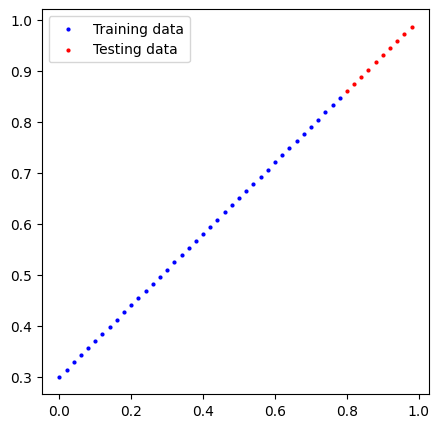

In [ ]:
plot_pred()

This is the ideal output, we know the relationship between x and y, because we create the linear regression model with pre_set parameters.

## Building our first pytorch model!

What our model does, start with random values (weight & bias)
look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data) 
We can do this through:

* gradient descent
* back propogation

In [ ]:
# Revisit the linear regression model again
# 1: create a linear regression model class
# This class inherits from nn.module (built-in)
import torch.nn as nn
class LinearRegressionModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        #initialize model parameters
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

        # forward defines the computation in the model
        def forward(self, x:torch.Tensor)->torch.Tensor:
            return self.weight * x + self.bias 


Last week, we have manually created a pair of linear regression parameters and created a nn modle for linear regression. 

This class, we will work through implementing gradient descent for a simple linear regression. Later, we will simulate a number of parameters, use GD and visualize the results in a 3D mesh to understand this process better.

Remember data first!

## Notes
> Installing a new library（plotly） for visualization, documents please find at : https://plotly.com/python/getting-started/
* #TODO 
    1. Check the jupyter env and vscode env, choose one as your code editor
    2. create a requirement.txt for the students to install all the libs and packages easily

    
    ` %%bash
    pip install plotly==5.10.0 `
    
    3. Briefly introduce the function of this library


In [ ]:
# Step 1:load data
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot

> we are using panda for loading the data from txt/csv file. If you want to dive into the panda library, hope the following links would help you:
* https://www.w3resource.com/python-exercises/pandas/index.php
* https://www.kaggle.com/learn/pandas

In [86]:
path = os.path.abspath('data.txt') # get the absolute complete path of the file
print(path)
data_df = pd.read_csv((path), header=None, names=['X','y'])
data_df.head()

/Users/zhiqi22/study/AIM course/AIM-MLWorkshop/w4/data.txt


,X,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,3.2365,6.4421
4,7.0032,11.8540


In [87]:
# Let's find more about the data
n_rows = data_df.shape[0]
X=data_df['X'].to_numpy().reshape(n_rows,1)
print('X.shape', X.shape)
# Represent X with an additional dim for vector computation
ones = np.ones((n_rows,1)) # generate a all one vector with shape of (n_rows,1)
X = np.concatenate((ones, X), axis=1) # concat them
y=data_df['y'].to_numpy().reshape(n_rows,1)


X.shape (23, 1)


In [67]:
y.shape

(7, 1)

Text(0.5, 1.0, 'Input dataset')

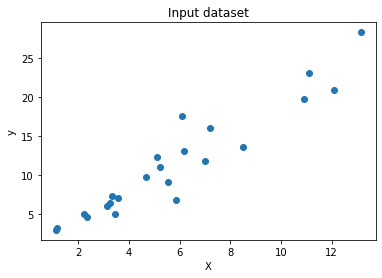

In [89]:
plt.scatter(x=data_df['X'], y=data_df['y'])
plt.xlabel('X'); plt.ylabel('y')
plt.title('Input dataset')

Here we will compute the cost function and code that into a Python function. Cost function is given by
$$
J\left(\theta_0, \theta_1\right)=\frac{1}{2 m} \sum_{i=1}^m\left(h_\theta\left(x_i\right)-y_i\right)^2
$$
Where $h_\theta(x_i) = \theta^T x$

In [90]:
def compute_cost(X, y, theta=np.array([[1],[3.5]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    print(theta)
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

### repeat until convergence
$$
\begin{aligned}
\theta_0 &:=\theta_0-\alpha \frac{1}{m} \sum_{i=1}^m\left[\left(h_\theta\left(x_i\right)-y_i\right) x_i^{(0)}\right] \\
\theta_1 &:=\theta_1-\alpha \frac{1}{m} \sum_{i=1}^m\left[\left(h_{\theta}\left(x_i\right)-y_i\right) x_i^{(1)}\right]
\end{aligned}
$$

In [91]:
def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y) # (11,2) * (2, 1)
        print('\nerror calculation:', error.shape)
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [ ]:
num_iterations=1500
theta_init=np.array([[1],[1]])
print('theta_init shape:', theta_init.shape) 
alpha=0.01
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

In [93]:
theta

array([[-0.03322573],
       [ 1.80000295]])

### Plot gradient descent


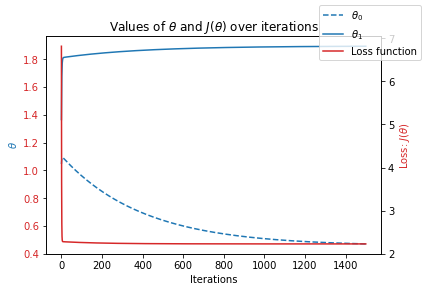

In [95]:
fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

If the GD algorithm is working properly, it should decrease after each iteration.

In [96]:
len(theta0_history)

1500

>Let us synthesize a range of theta values and compute the cost surface as a mesh. We will then overlay the path our GD algorithm took to reach the optima

In [ ]:
# theta range
theta0_vals = np.linspace(-10,0,100)
theta1_vals = np.linspace(-1,4,100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

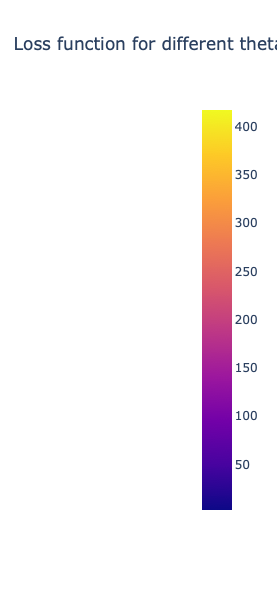

In [98]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(x=theta0_vals, y=theta1_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [ ]:
num_iterations=1500
theta_init=np.array([[-3],[4]])
alpha=0.01
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

## Visualize loss function as contours
And overlay the path took by GD to seek optima

In [3]:
import numpy as np
# linspace generates evenly spaced numbers over a specified interval. Numpy logspace return numbers spaced evenly on a log scale.
np.logspace(1, 5, base=2,num=10)

array([ 2.        ,  2.72158   ,  3.70349885,  5.0396842 ,  6.85795186,
        9.33223232, 12.69920842, 17.28095582, 23.51575188, 32.        ])

logspace computes its start and end points as base ** start $$np.power(base, start)$$ and base**stop respectively. The base value can be specified, but is 10.0 by default.

For the above example we have a start value of 2 ** 1 == 2 and a stop value of 2**5 == 32.

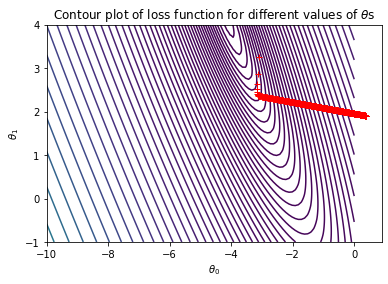

In [100]:
plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(-2,3,100))# number_samples = 100
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history, theta1_history, 'r+');

### More about gradient descent 
[link](https://builtin.com/data-science/gradient-descent)
- Batch gradient descent
- Mini-batch gradient descent
- Stochastic gradient descent